In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [28]:
cb = pd.read_csv("marketing_campaign.csv" , sep='\t')
cb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [29]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

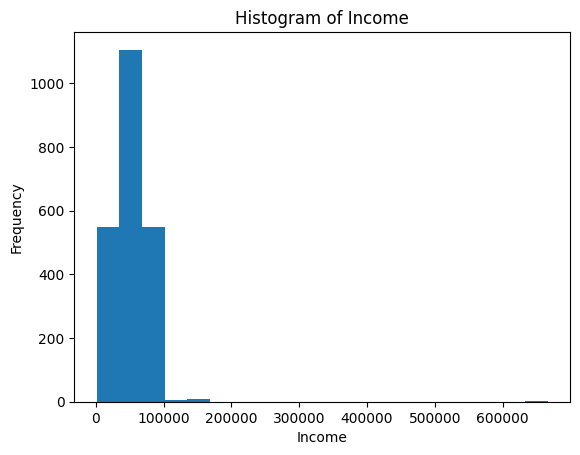

In [30]:
#histogram for the column Income
plt.hist(cb['Income'], bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

In [31]:
#median_Income
median_income = cb['Income'].median()
print("Median Income:", median_income)
cb['Income'].fillna(median_income, inplace=True)

Median Income: 51381.5


C:\Users\Admin\AppData\Local\Temp\ipykernel_20952\1949601758.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cb['Income'].fillna(median_income, inplace=True)


In [32]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [33]:
# Define the hierarchy for ordinal encoding
education_hierarchy = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}

# Map the hierarchy to the 'Education' column
cb['Education_Encoded'] = cb['Education'].map(education_hierarchy)

# One-hot encode 'Marital_Status' column
cb = pd.get_dummies(cb, columns=['Marital_Status'], prefix='Marital',dtype=int)

# Convert 'Dt_Customer' to datetime format
cb['Dt_Customer'] = pd.to_datetime(cb['Dt_Customer'], format='%d-%m-%Y')

# Convert to integer
reference_date = cb['Dt_Customer'].min()
cb['Dt_Customer_Int'] = (cb['Dt_Customer'] - reference_date).dt.days

# Feature selection
features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Create new features
cb['TotalSpent'] = cb['MntWines'] + cb['MntFruits'] + cb['MntMeatProducts'] + cb['MntFishProducts'] + cb['MntSweetProducts'] + cb['MntGoldProds']
cb['TotalPurchases'] = cb['NumDealsPurchases'] + cb['NumWebPurchases'] + cb['NumCatalogPurchases'] + cb['NumStorePurchases']

# Update features list
features.extend(['TotalSpent', 'TotalPurchases'])


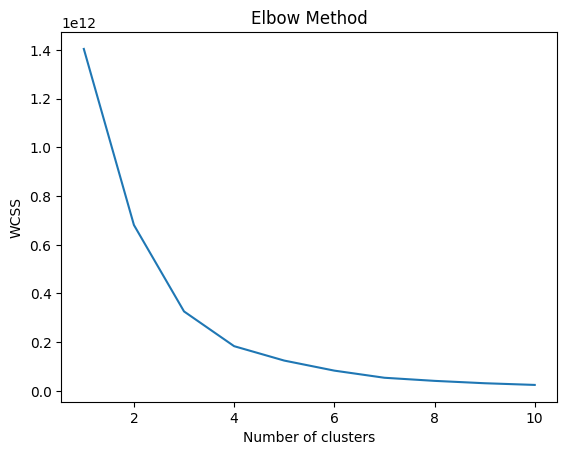

Silhouette Score: 0.5433155129460011


In [34]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cb[features])
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters
optimal_clusters = 4  # Example, choose based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cb['Cluster'] = kmeans.fit_predict(cb[features])

# Evaluate the quality of the clusters using silhouette score
silhouette_avg = silhouette_score(cb[features], cb['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

                Income    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                          
0         28315.736130   30.316644   6.006766        25.608931   
1         76931.910015  615.606676  56.886792       396.770682   
2        666666.000000    9.000000  14.000000        18.000000   
3         52299.610358  288.840937  18.827374       100.678175   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0               9.093369          6.073072     17.756428           2.143437   
1              82.682148         60.101597     70.043541           1.609579   
2               8.000000          1.000000     12.000000           4.000000   
3              25.106042         18.152898     45.887793           3.096178   

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster                                                     

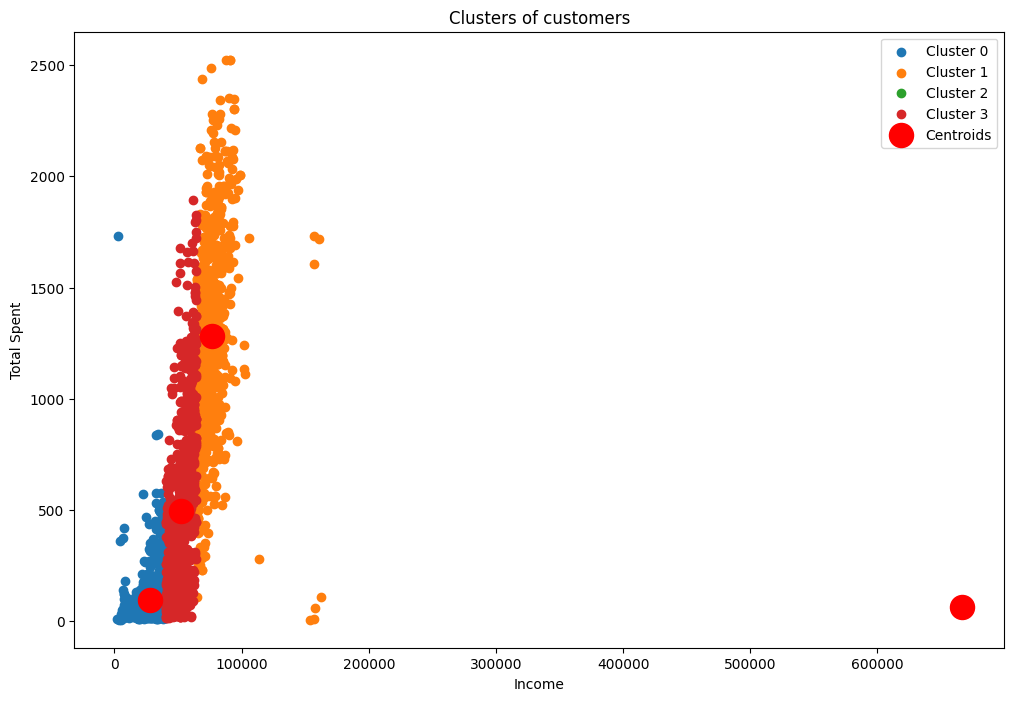

In [35]:
# Analyze the characteristics of each cluster
cluster_analysis = cb.groupby('Cluster')[features].mean()
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(12, 8))
for i in range(optimal_clusters):
    plt.scatter(cb[cb['Cluster'] == i]['Income'], cb[cb['Cluster'] == i]['TotalSpent'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, features.index('Income')], kmeans.cluster_centers_[:, features.index('TotalSpent')], s=300, c='red', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.legend()
plt.show()


- Cluster 0 (Blue): Customers with low income and low total spending. This group represents the lowest-spending segment.

- Cluster 1 (Orange): Customers with moderate income and moderate to high total spending. This group represents a larger portion of the dataset and spans a wide range of spending levels.

- Cluster2 (Green): Customers with higher income and moderate to high total spending. This group is distinct from Cluster 1 but overlaps slightly.

- Cluster3 (Red): Customers with very high income and very high total spending. This group is relatively small and represents the highest-spending segment.

- Centroids: The red dots indicate the centers of each cluster. They are well-separated, suggesting that the clusters are distinct.

In [36]:
# Document the process and results
print("Data Preprocessing and Cleaning")
print("1. Handled missing values by filling with the mean.")
print("2. Encoded categorical variables using category codes.")
print("3. Scaled numerical features using StandardScaler.")
print("..................................................................")

print("\n### Feature Selection and Engineering")
print("1. Selected relevant features for clustering.")
print("2. Created new features: TotalSpent and TotalPurchases.")
print(".......................................................................")

print("Clustering Algorithm")
print("1. Used the Elbow method to determine the optimal number of clusters.")
print("2. Applied K-Means clustering with the optimal number of clusters.")
print("3. Evaluated the quality of the clusters using the silhouette score.")
print("............................................................")

print("Cluster Analysis and Interpretation")
print("1. Analyzed the characteristics of each cluster.")
print("2. Visualized the clusters using a scatter plot.")
print("......................................................................")

print("Results")
print(f"Optimal number of clusters: {optimal_clusters}")
print(f"Silhouette Score: {silhouette_avg}")
print(cluster_analysis)
print("...........................................................................")

Data Preprocessing and Cleaning
1. Handled missing values by filling with the mean.
2. Encoded categorical variables using category codes.
3. Scaled numerical features using StandardScaler.
..................................................................

### Feature Selection and Engineering
1. Selected relevant features for clustering.
2. Created new features: TotalSpent and TotalPurchases.
.......................................................................
Clustering Algorithm
1. Used the Elbow method to determine the optimal number of clusters.
2. Applied K-Means clustering with the optimal number of clusters.
3. Evaluated the quality of the clusters using the silhouette score.
............................................................
Cluster Analysis and Interpretation
1. Analyzed the characteristics of each cluster.
2. Visualized the clusters using a scatter plot.
......................................................................
Results
Optimal number of clusters: 4